In [1]:
# Held from Kyle Manning, Ronit Rapoport, Sara Stinson

In [2]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'

# Inspect the page to find the tags
# tags: <h3> for artist's names; div class="vertical..." for induction year

names = []
years = []

for pages in range (1,17) :
    response = requests.get(url + str(pages))
    soup = bs(response.text)
    names.extend(soup.findAll('h3'))
    years.extend(soup.findAll('div', attrs={'class': "vertical-card_content--copy"}))
    
# Notes: I was having problems with this all day because I was not using the varaiable the loop
# creates. I.E. names for name or years for year.
# git gud at for X in Y. The X and Y were what I was using wrong.

artist = []

for name in names :
    artist.append(name.text)
    
# The [9:] is from reading the raw "Inducted YYYY"

inducted = []

for year in years :
    inducted.append(year.get_text(strip=True)[9:])

In [4]:
hall_of_fame = pd.DataFrame({'Artist':artist, 'Inducted':inducted})
hall_of_fame

,Artist,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
138,Hank Williams Jr.,2021
139,Bob Wills,1968
140,Mac Wiseman,2014
141,Tammy Wynette,1998


In [12]:
hall_of_fame['Inducted'] = hall_of_fame['Inducted'].astype(int)

In [13]:
hall_of_fame.dtypes

Artist      object
Inducted     int32
dtype: object

<AxesSubplot:>

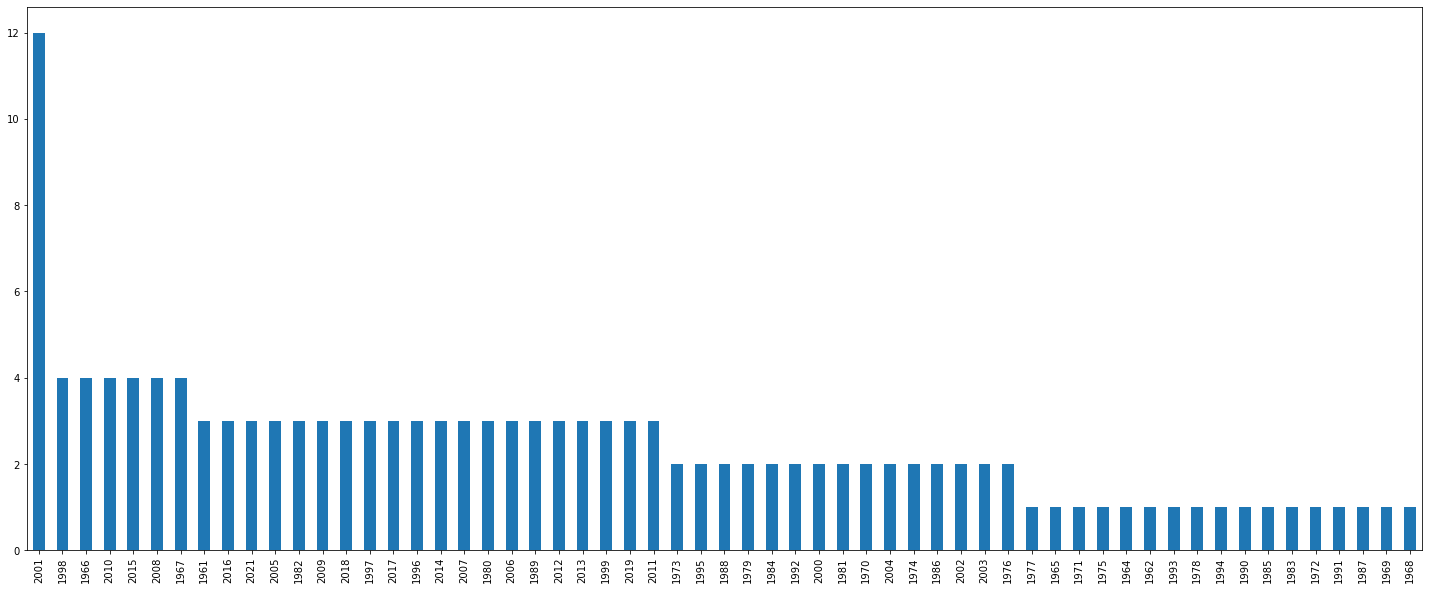

In [22]:
plt.figure(figsize = (25,10))
#hall_of_fame['Inducted'] = np.datetime64

hall_of_fame['Inducted'].value_counts().plot(kind = 'bar')